# Metapoblación inicial

##### **¿Cómo medir claramente el impacto de la intensificación?** 
##### segundo intento

Intento acoplar el sistema LV y la migración de forma que cuando el paisaje es por completo de vegetación primaria, coexistan las 10 especies.

Usaré el modelo extendido, con todas las celdas de vegetación primaria (`manejo = 1.0`).

In [2]:
# Módulos necesarios
import numpy as np
import seaborn
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from copy import deepcopy

In [3]:
np.set_printoptions(precision=3)

In [4]:
%matplotlib nbagg

C:\Anaconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


### Paisaje

In [5]:
test1 = ["b"] * 10
print test1
test2 = [test1] * 10
print test2
paisaje = test2
print paisaje

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
[['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']]
[['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], ['b', 'b', 

In [6]:
# Convertir el paisaje a un arreglo numérico para graficar
def paisaje_numerico(paisaje, m_milpa, m_intensivo):
    paisaje_numerico = deepcopy(paisaje)
    for i in range(len(paisaje)):
            for j in range(len(paisaje[0])):
                if paisaje[i][j] == 'b': paisaje_numerico[i][j] = 1.
                if paisaje[i][j] == 'm': paisaje_numerico[i][j] = 1-m_milpa
                if paisaje[i][j] == 'i': paisaje_numerico[i][j] = 1-m_intensivo
    paisaje_numerico = np.array(paisaje_numerico)
    return paisaje_numerico

In [7]:
paisaje_num = paisaje_numerico(paisaje, 0, 0)

<IPython.core.display.Javascript object>


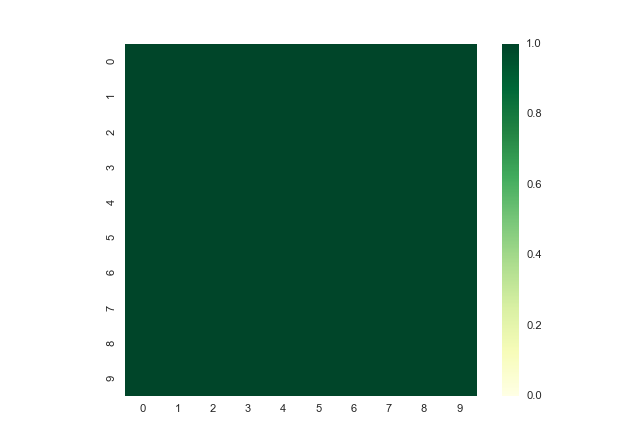

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [8]:
seaborn.heatmap(paisaje_num, cmap = "YlGn", vmin = 0, square=True)

### Comunidad

In [9]:
condiciones_iniciales = np.loadtxt("osFri-Jan-30-114717-2015-c.txt")
tasas_reproduccion = np.loadtxt("osFri-Jan-30-114717-2015-v.txt")
matriz_interacciones = np.loadtxt("osFri-Jan-30-114717-2015-m.txt")

### Parámetros iniciales

En este caso interesa estudiar `iter_difymuerte`, que es el parámetro que acopla el sistema LV con la migración.

Del experimento anterior (2015-12-17 LotkaVolterra), sin considerar el espacio, la riqueza de especies al final de la simulación es 4.

In [10]:
x_celdas = 10
y_celdas = 10

# Obtenemos el número de especies de la matriz de interacciones, que debe ser cuadrada
n_especies = matriz_interacciones.shape[1]

Disp = {'b':0.3, 'm':1.0, 'i':1.0} #tasas dipersión

m_milpa = 0.3 # tasa muerte negra
m_intensivo = 0.6 # tasa muerte blanca

#h = 0.001 #diferencial de cambio en t (euler y graficas)
t_total = 500 #tiempo total de simulacion
iter_difymuerte = 1 #iteraciones de dif y muerte entre cada una de lotka volterra

Poblar el paisaje:

In [11]:
%run genera_poblacion_inicial.py

In [12]:
poblacion_0 = genera_poblacion_inicial(paisaje, n_especies, 
                                       p0_bosque = condiciones_iniciales, p0_milpa=0, 
                                       p0_intensivo=0)

<string>:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
<string>:40: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


### Modelo2

In [13]:
%run modelo2.py

In [ ]:
"""
poblacion1b = correr_2DMM_2(poblacion_0, 
                        paisaje, 
                        t_total, 
                        n_especies, 
                        d_lotkavolterra_alea_3, 
                        tasas_reproduccion, 
                        matriz_interacciones,
                        m_milpa, m_intensivo, Disp, 'vecinos8', iter_difymuerte = 1)

np.save("2015-12-18_poblacion1b", poblacion1b)
"""

In [ ]:
# Para repetir experimento
#poblacion1 = np.load("2015-12-18_poblacion1.npy")

In [ ]:
"""
poblacion2b = correr_2DMM_2(poblacion_0, 
                        paisaje, 
                        t_total, 
                        n_especies, 
                        d_lotkavolterra_alea_3, 
                        tasas_reproduccion, 
                        matriz_interacciones,
                        m_milpa, m_intensivo, Disp, 'vecinos8', iter_difymuerte = 2)

np.save("2015-12-18_poblacion2b", poblacion2b)
"""

Nota: `poblacion2b` debe ser igual a `poblacion2`, la diferencia es que en 2b ya no se guardan los valores de población entre cada iteración de migración; en ambos sólo se debe guardar el valor de la población para los 1000 pasos de iteración.

In [ ]:
# Para repetir experimento
#poblacion2 = np.load("2015-12-18_poblacion2.npy")

### De nuevo...

In [14]:
"""
poblacion3 = correr_2DMM_2(poblacion_0, 
                        paisaje, 
                        t_total, 
                        n_especies, 
                        d_lotkavolterra_alea_3, 
                        tasas_reproduccion, 
                        matriz_interacciones,
                        m_milpa, m_intensivo, Disp, 'vecinos8', iter_difymuerte = 1)

np.save("2015-12-18_poblacion3", poblacion3)
"""

In [15]:
"""
poblacion4 = correr_2DMM_2(poblacion_0, 
                        paisaje, 
                        t_total, 
                        n_especies, 
                        d_lotkavolterra_alea_3, 
                        tasas_reproduccion, 
                        matriz_interacciones,
                        m_milpa, m_intensivo, Disp, 'vecinos8', iter_difymuerte = 2)

np.save("2015-12-18_poblacion4", poblacion4)
"""

In [16]:
"""
poblacion5 = correr_2DMM_2(poblacion_0, 
                        paisaje, 
                        t_total, 
                        n_especies, 
                        d_lotkavolterra_alea_3, 
                        tasas_reproduccion, 
                        matriz_interacciones,
                        m_milpa, m_intensivo, Disp, 'vecinos8', iter_difymuerte = 3)

np.save("2015-12-18_poblacion5", poblacion5)
"""

In [ ]:
# Para repetir experimento
#poblacion3 = np.load("2015-12-18_poblacion3.npy")
#poblacion4 = np.load("2015-12-18_poblacion4.npy")
#poblacion5 = np.load("2015-12-18_poblacion5.npy")

### Medidas biodiversidad

In [17]:
% run medidas_biodiversidad.py

In [18]:
tiempo = np.arange(0, 500)
riqueza3 = np.zeros_like(tiempo)
riqueza4 = np.zeros_like(tiempo)
riqueza5 = np.zeros_like(tiempo)
#riqueza4 = np.zeros_like(tiempo)


for t in tiempo:
    riqueza3[t] = riqueza_paisaje(poblacion3, t)[1]
    riqueza4[t] = riqueza_paisaje(poblacion4, t)[1]
    riqueza5[t] = riqueza_paisaje(poblacion5, t)[1]
    #riqueza4[t] = riqueza_paisaje(poblacion4, t)[1]

<IPython.core.display.Javascript object>


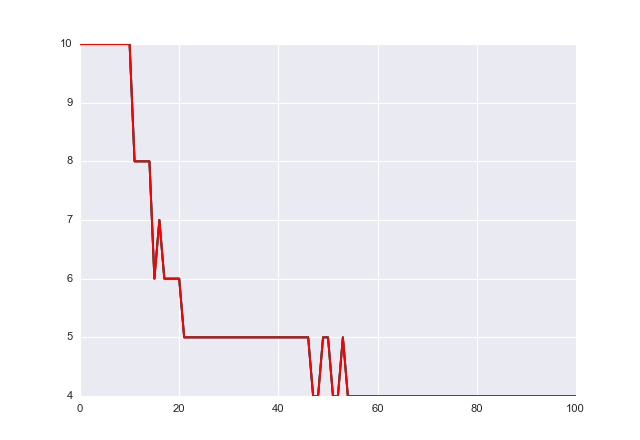

In [21]:
#Gráficas de riqueza
fig = plt.figure()
fig.add_subplot(111)
plt.plot(tiempo, riqueza3, color="blue")
plt.plot(tiempo, riqueza4, color="green")
plt.plot(tiempo, riqueza5, color="red")
#plt.plot(tiempo, riqueza4, color="black")

#plt.ylim(ymax = 10, ymin = 0)
plt.xlim(xmax = 100)
plt.show() 

In [22]:
poblacion5.shape 

(501, 10, 10, 10)

In [35]:
poblacion5[:500, 5, 5, 2].shape

(500,)

In [33]:
tiempo.shape

(500,)

¿Cómo se comporta la población de una especie en una celda?


<IPython.core.display.Javascript object>


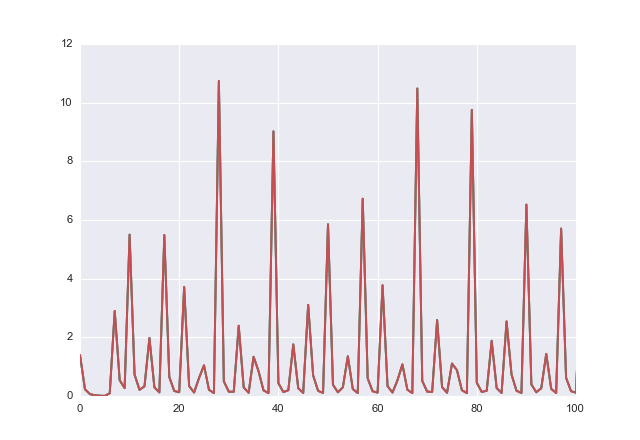

In [44]:
fig = plt.figure()
fig.add_subplot(111)
plt.plot(tiempo, poblacion3[:500, 5, 5, 6]) # [tiempo, x, y, especie]
plt.plot(tiempo, poblacion4[:500, 5, 5, 6]) # [tiempo, x, y, especie]
plt.plot(tiempo, poblacion5[:500, 5, 5, 6]) # [tiempo, x, y, especie]
plt.xlim(xmax = 100)
plt.show() 

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
# (From numericalmooc by Lorena Barba)
from IPython.core.display import HTML
css_file = "C:\Users\hp\Desktop\proyectof\style.css"
HTML(open(css_file, "r").read())